In [ ]:
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

# pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df = pd.read_csv('/content/DataEngineer.csv')
color = ['#222324', '#D6001C', '#221f1f', '#b20710', '#F7C4C4', '#FFF0E5', '#FDF1CB', '#ECFAEC', '#E5F3FF', '#F4EBFA']
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [ ]:
for column_name in df.columns:
  print('\033[31m' + column_name + '\033[0;0m \n', df[column_name].value_counts(dropna=False), '\n', '-------------------------------------------------------')
  null_rate = df[column_name].isna().sum() / len(df) * 100 
  if null_rate > 0 :
    print("{} null rate: {}%".format(column_name,round(null_rate,2)))
  time.sleep(2) # у колаба ограничение на вывод данных в единицу времени

Job Title 
 Data Engineer                                          469
Senior Data Engineer                                   103
Software Engineer                                       93
Big Data Engineer                                       73
Sr. Data Engineer                                       35
                                                      ... 
Graduate Engineer - Land                                 1
Data Center Hardware Engineer I                          1
Tier II TAC Engineer                                     1
IT Support Engineer I                                    1
Future Opportunities: Software Development Engineer      1
Name: Job Title, Length: 1260, dtype: int64 
 -------------------------------------------------------
Salary Estimate 
 $60K-$109K (Glassdoor est.)    62
$75K-$135K (Glassdoor est.)    44
$82K-$130K(Employer est.)      42
$52K-$85K (Glassdoor est.)     32
$53K-$100K (Glassdoor est.)    32
                               ..
$70K-$138K (Gla

#Построить график компаний с самым большим кол-вом вакансий

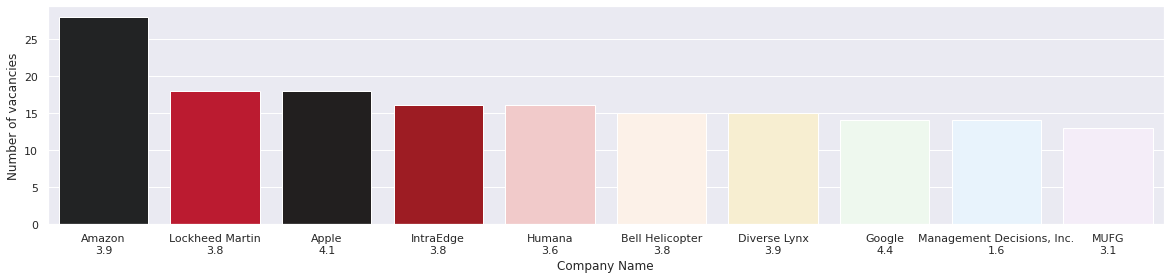

In [ ]:
data = df['Company Name'].value_counts(dropna=False)[:10].rename_axis('Company Name').reset_index(name='Number of vacancies')
# data
sns.set (rc={"figure.figsize":(20 , 4 )})
sns.barplot(data=data, x=data['Company Name'], y=data['Number of vacancies'], palette=color, estimator=np.sum)

#Построить график самых популярных названий в вакансиях

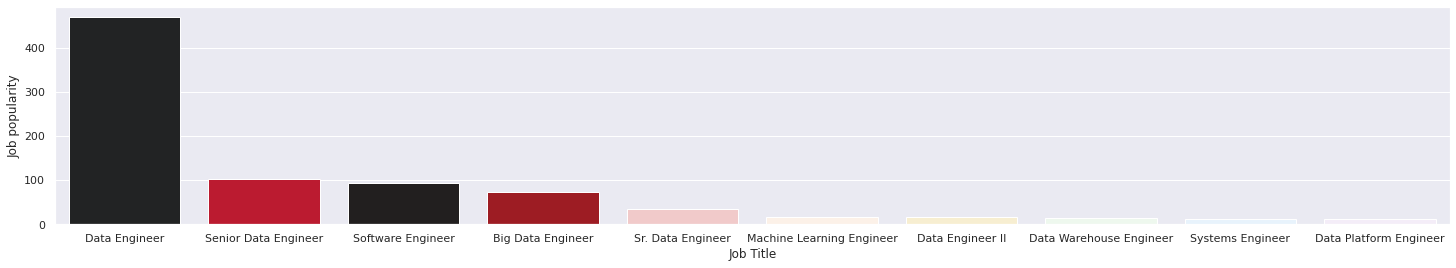

In [ ]:
data = df['Job Title'].value_counts(dropna=False)[:10].rename_axis('Job Title').reset_index(name='Job popularity')
sns.set (rc={"figure.figsize":(25 , 4 )})
sns.barplot(data=data, x=data['Job Title'], y=data['Job popularity'], palette=color, estimator=np.sum)

#Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

,Title,Number of locations
0,"Houston, TX",199
1,"Austin, TX",199
2,"San Diego, CA",195
3,"Chicago, IL",192
4,"San Antonio, TX",190
5,"New York, NY",187
6,"Philadelphia, PA",135
7,"Jacksonville, FL",122
8,"Phoenix, AZ",117
9,"Irving, TX",106


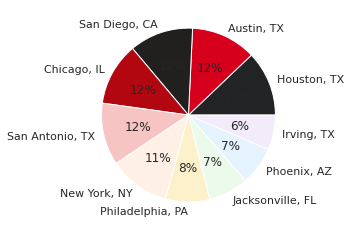

In [ ]:
data = df['Location'].value_counts(dropna=False).rename_axis('Title').reset_index(name='Number of locations')[:10]
plt.pie(data['Number of locations'], labels = data['Title'], colors=color, autopct='%.0f%%')
data

#Построить график популярности по колонке Type of ownership, относительно численности вакансий

Unknown


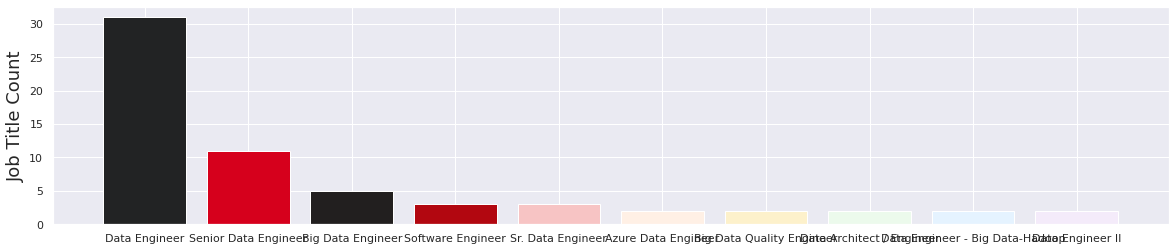

College / University


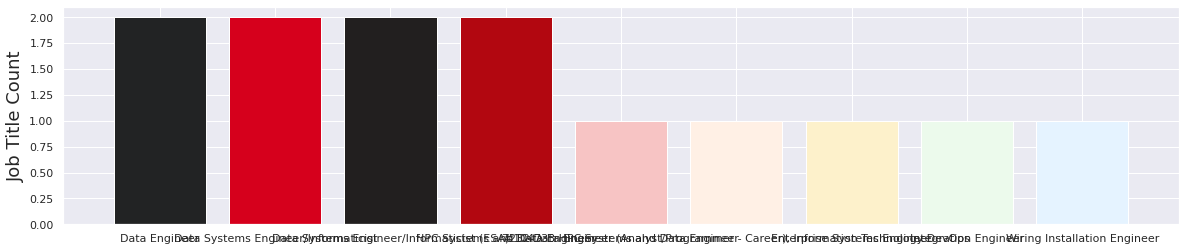

Company - Private


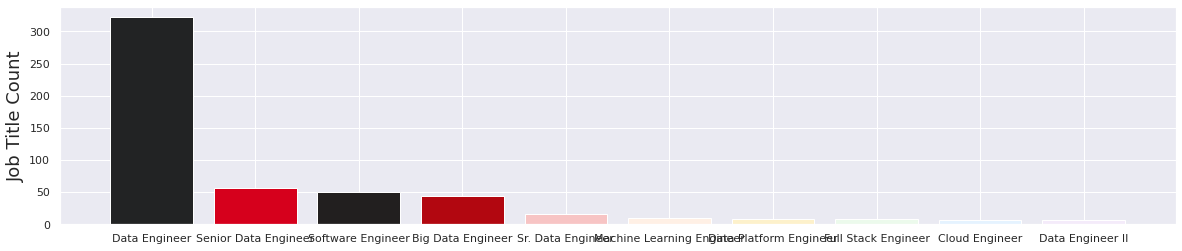

Company - Public


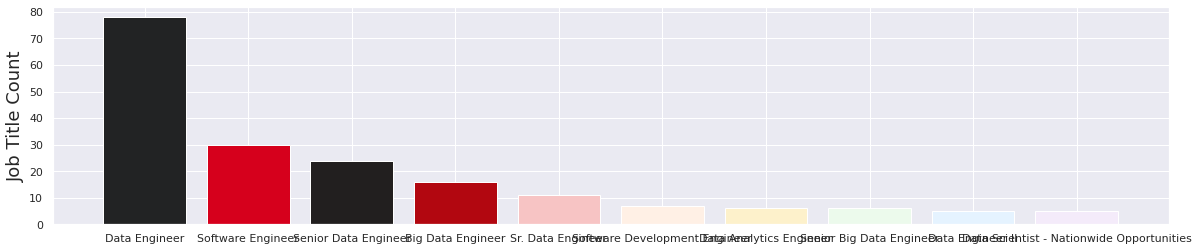

Contract


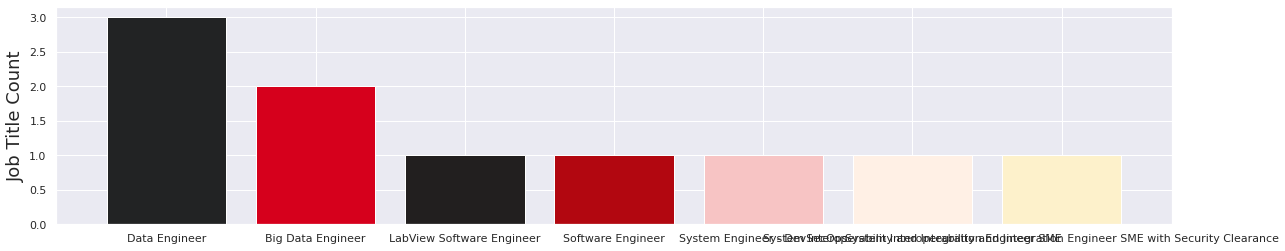

Government


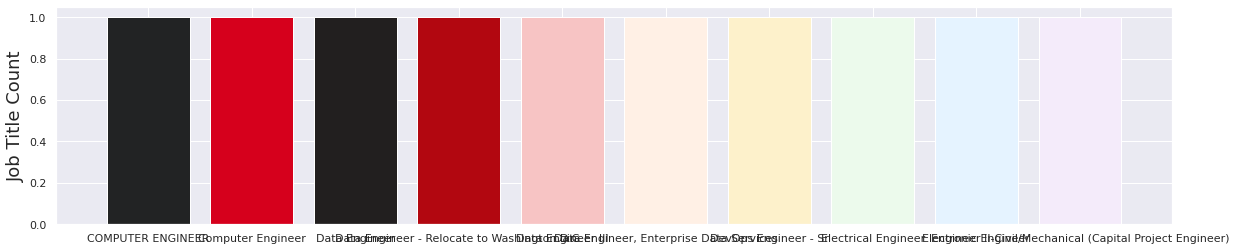

Hospital


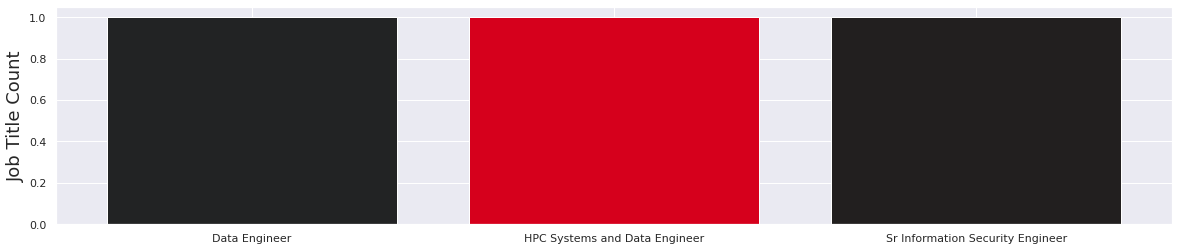

Nonprofit Organization


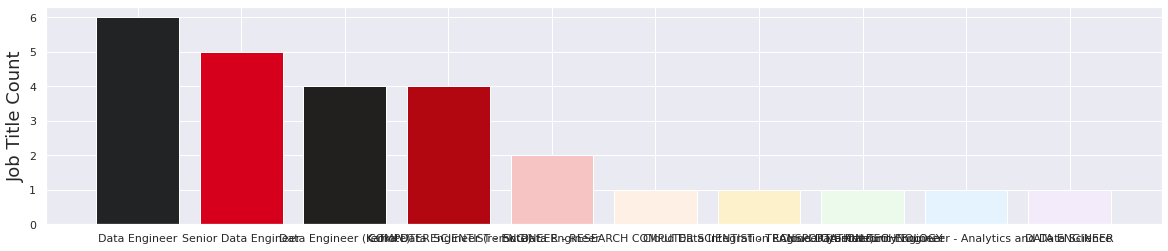

Other Organization


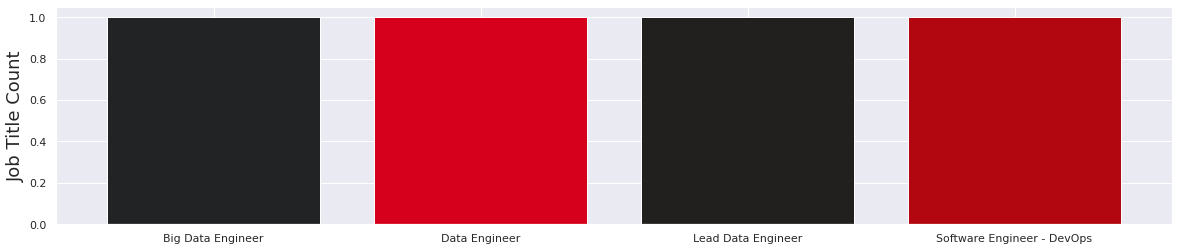

Private Practice / Firm


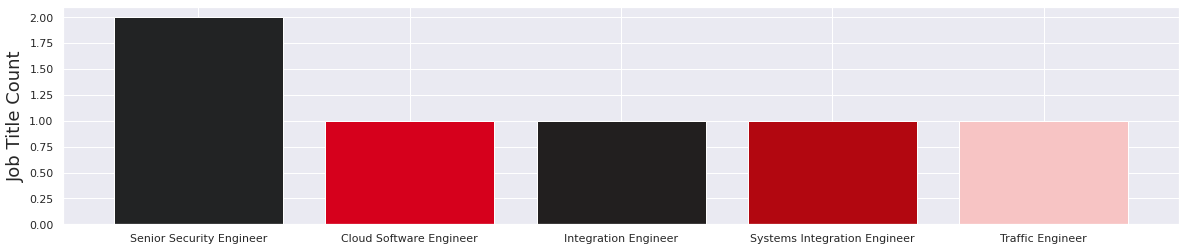

School / School District


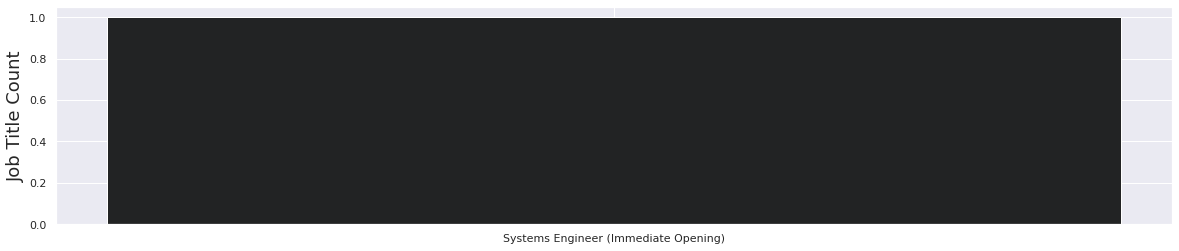

Self-employed


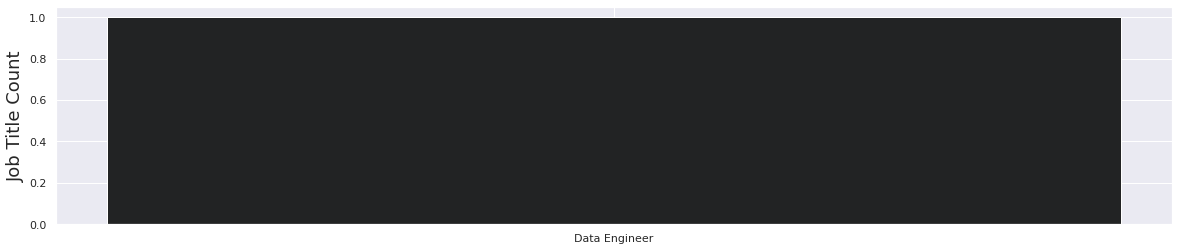

Subsidiary or Business Segment


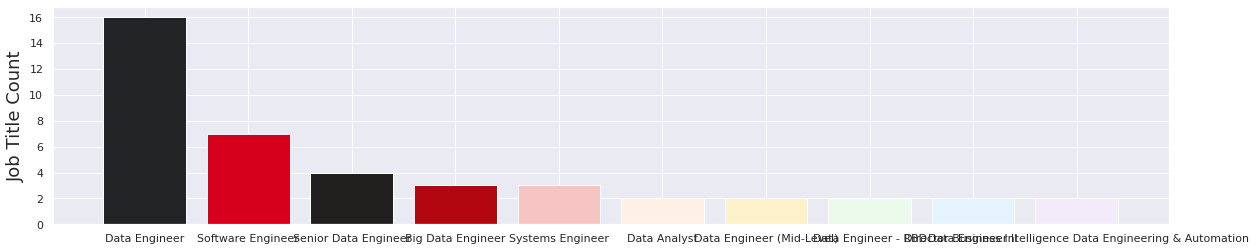

In [ ]:
data = df.groupby('Type of ownership')['Job Title'].value_counts(dropna=False).rename_axis(['Type of ownership', 'Job Title']).reset_index(name='Job Title Count')
data.loc[data['Type of ownership'] == '-1', 'Type of ownership'] = 'Unknown'
for group in data['Type of ownership'].unique():
  print(group)
  data_group = data.loc[data['Type of ownership'] == group][:10]
  plt.bar(data_group['Job Title'], data_group['Job Title Count'], label=group, color=color)
  plt.ylabel('Job Title Count', fontsize = 18)
  plt.pause(0.05)

#Построить график популярности по секторам работы

,Sector,Number of sectors
0,Information Technology,890
1,Business Services,416
2,Unknown,375
3,Finance,177
4,Aerospace & Defense,94
5,Manufacturing,93
6,Insurance,82
7,Media,52
8,Health Care,51
9,"Oil, Gas, Energy & Utilities",37


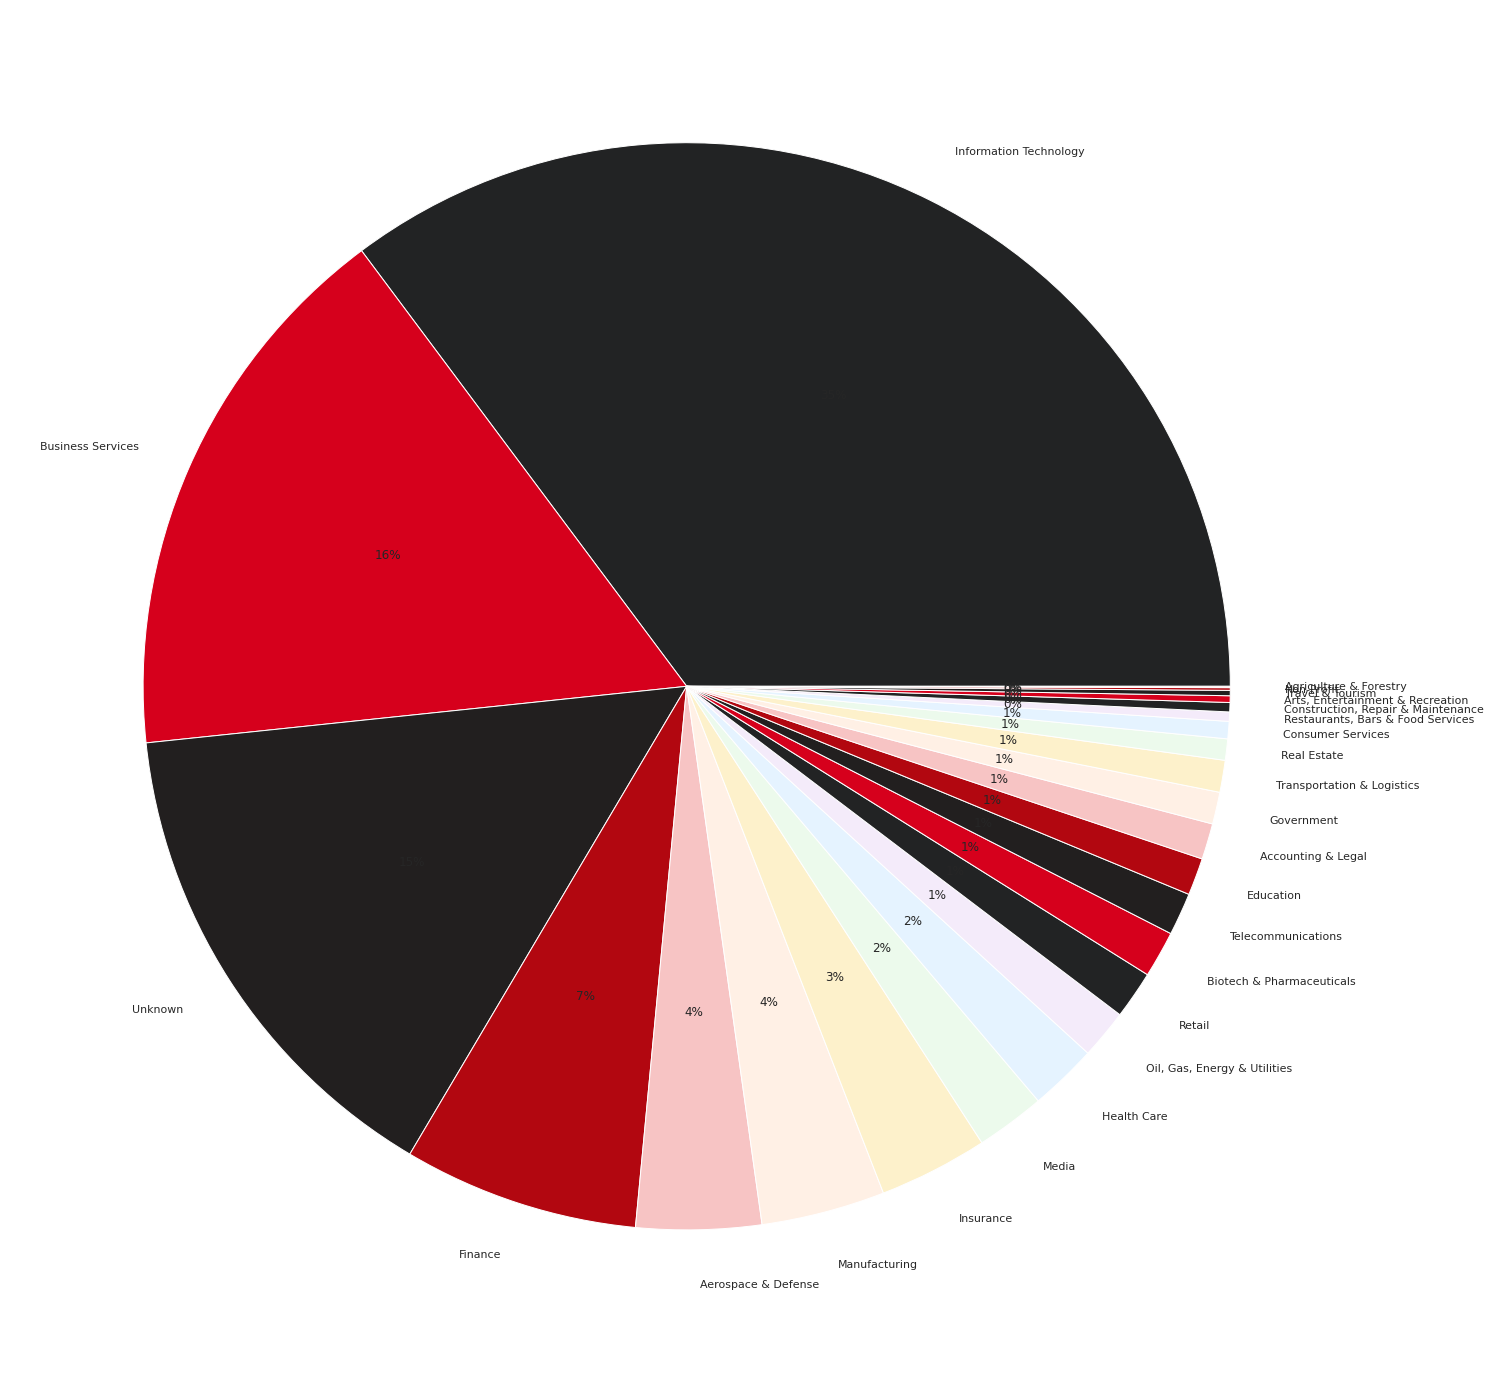

In [ ]:
data = df['Sector'].value_counts(dropna=False).rename_axis('Sector').reset_index(name='Number of sectors')
data.loc[data['Sector'] == '-1', 'Sector'] = 'Unknown'

plt.figure(figsize = (25,25))
plt.pie(data['Number of sectors'], labels = data['Sector'], colors=color, autopct='%.0f%%')
data

#Построить график используя сектора работы и средний уровень зарплат в них

In [ ]:
df.loc[df['Sector'] == '-1', 'Sector'] = 'Unknown'

df1 = df.copy()

salary_dict = {}
index = df1.index
count = 0

for i in df['Salary Estimate']:
  salary_estimate = ''

  if '-$' in i:
    i = i.split('-$')[1]

  for j in i:
    if j.isdigit():
      salary_estimate += j

  df1['Salary Estimate'][count] = int(salary_estimate)
  count += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


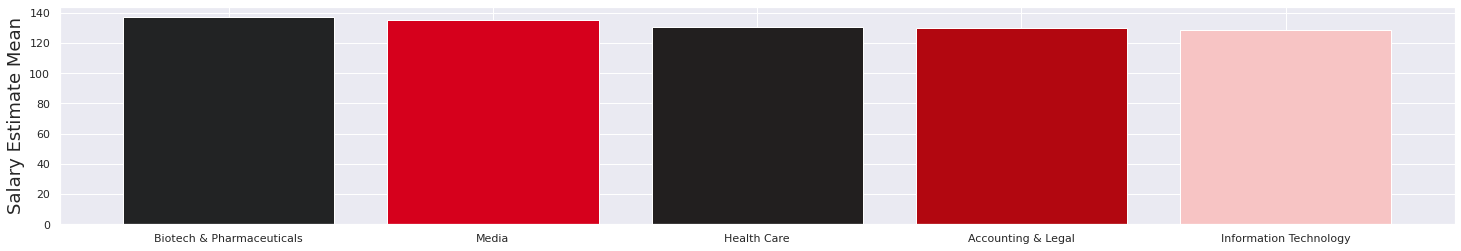

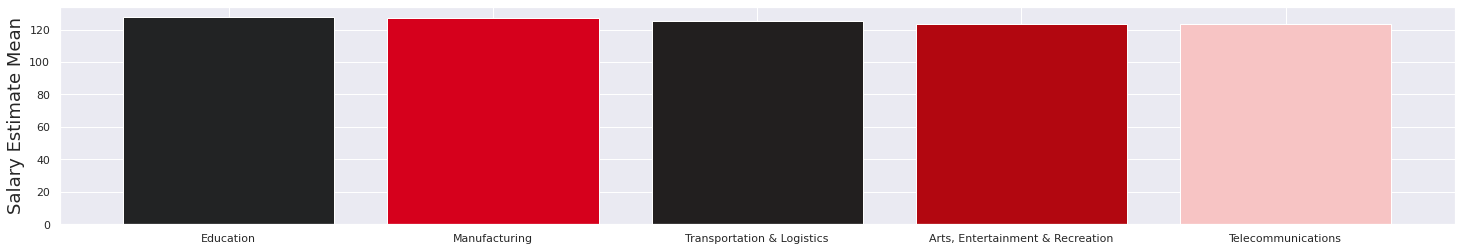

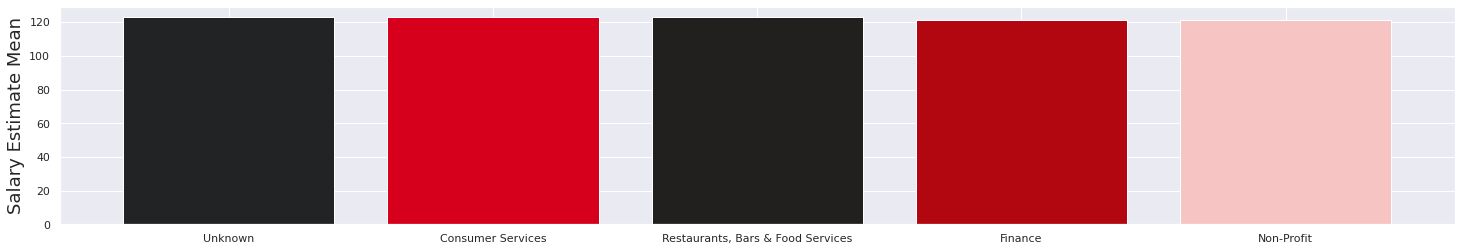

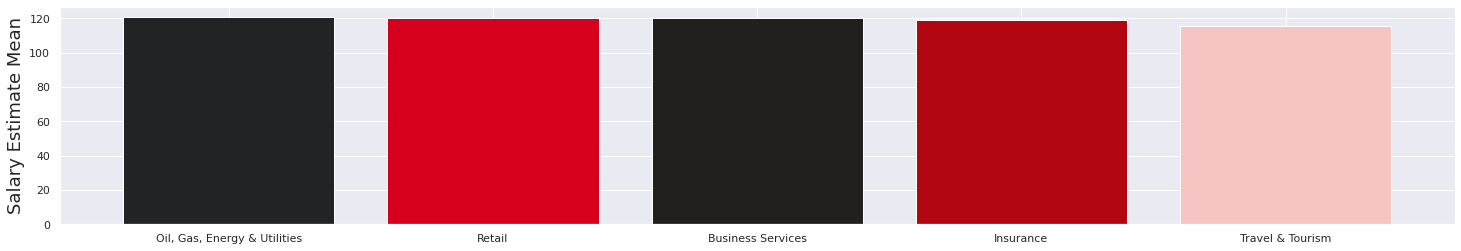

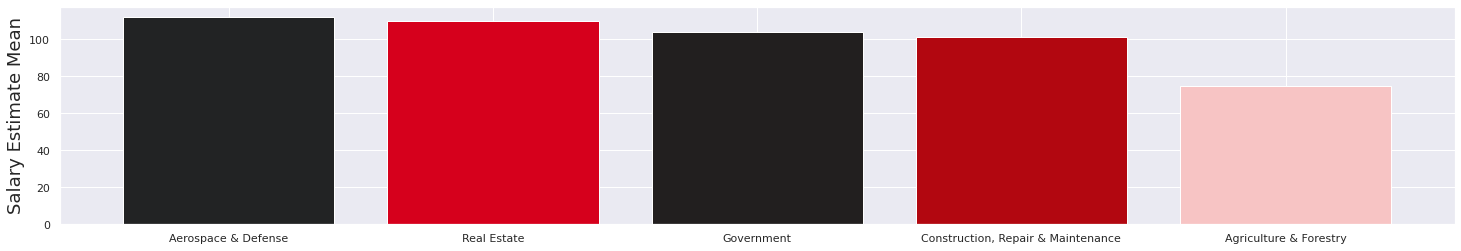

In [ ]:
df2 = df1.groupby('Sector')['Salary Estimate'].mean().round(2).rename_axis(['Sector']).reset_index(name='Salary Estimate Mean').sort_values(by='Salary Estimate Mean', ascending=False)
df2
parts = np.array_split(df2, 5)
for part in parts:
  plt.bar(part['Sector'], part['Salary Estimate Mean'], label=part['Sector'], color=color)
  plt.ylabel('Salary Estimate Mean', fontsize = 18)
  plt.pause(0.05)

#Построить гистограмму распределения рейтинга компаний

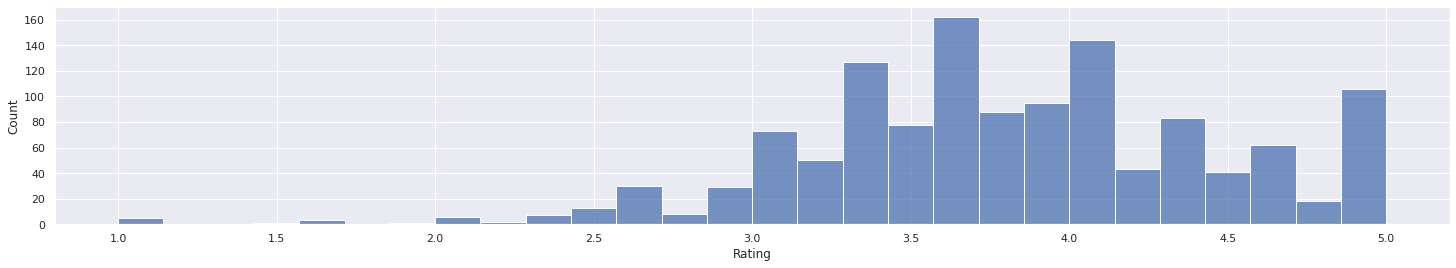

In [ ]:
df1 = df.loc[df['Rating'] != -1.0]
df1 = df1.groupby('Company Name')['Rating'].value_counts().rename_axis(['Company Name', 'Rating']).reset_index(name='Company Name Frequency').sort_values(by='Rating', ascending=False)
sns.histplot(data=df1, x="Rating", palette=color)

#Построить график средних зарплат по популярным компаниям

In [ ]:
df1 = df[['Salary Estimate', 'Company Name']]

salary_dict = {}
index = df1.index
count = 0

for i in df['Salary Estimate']:
  salary_estimate = ''

  if '-$' in i:
    i = i.split('-$')[1]

  for j in i:
    if j.isdigit():
      salary_estimate += j

  df1['Salary Estimate'][count] = int(salary_estimate)
  count += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df2 = df.loc[df['Rating'] == 5.0]
df2 = df2['Company Name'].value_counts(dropna=False).rename_axis(['Company Name']).reset_index(name='Company Name Frequency')[:10]
most_popilar_companys = df2['Company Name'].tolist()
most_popilar_companys

['Georgia IT Inc.\n5.0',
 'Nucleusteq\n5.0',
 'Koddi\n5.0',
 'HealthVerity\n5.0',
 'ELEVI Associates\n5.0',
 'Maestro Technologies\n5.0',
 'pddninc.net\n5.0',
 'Clumio\n5.0',
 'ingenium.agency\n5.0',
 'SpyCloud\n5.0']

In [ ]:
df3 = df1.loc[df1['Company Name'].isin(most_popilar_companys)]
df3 = df3.groupby('Company Name')['Salary Estimate'].mean().round(2).rename_axis(['Company Name']).reset_index(name='Salary Estimate Mean').sort_values(by='Salary Estimate Mean', ascending=False)
df3

,Company Name,Salary Estimate Mean
0,Clumio\n5.0,174.67
7,SpyCloud\n5.0,145.67
6,Nucleusteq\n5.0,134.80
2,Georgia IT Inc.\n5.0,129.88
9,pddninc.net\n5.0,129.00
3,HealthVerity\n5.0,126.25
8,ingenium.agency\n5.0,121.00
5,Maestro Technologies\n5.0,115.00
1,ELEVI Associates\n5.0,114.25
4,Koddi\n5.0,113.50


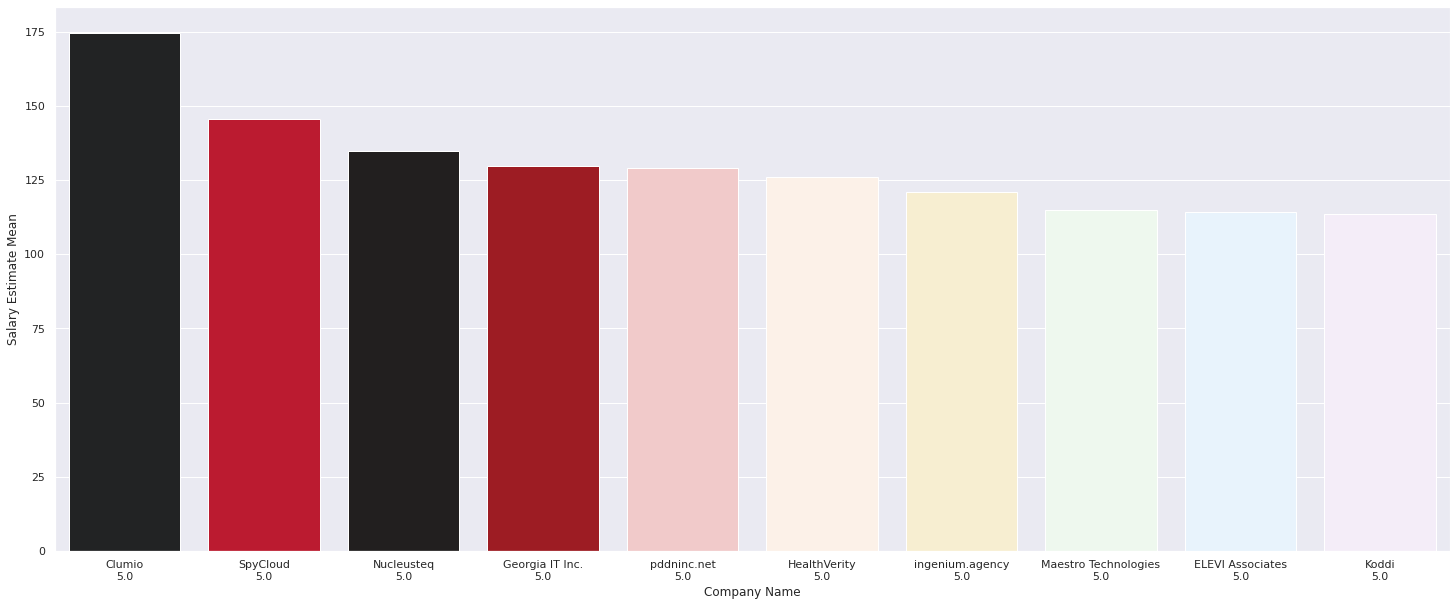

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data=df3, x="Company Name", y="Salary Estimate Mean", palette=color)

#Построить по описанию вакансий облако тегов, исследовать самые популярные слова

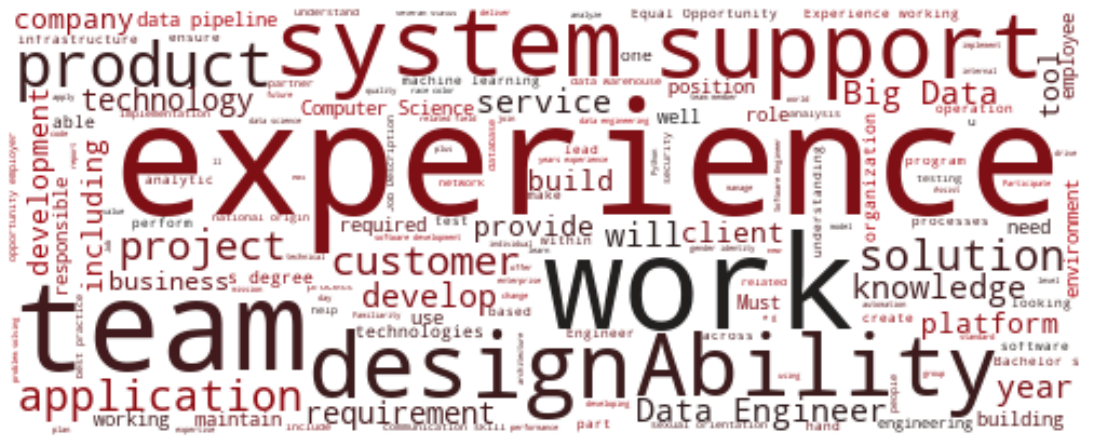

In [ ]:
from wordcloud import WordCloud
import random
import re
import matplotlib
from PIL import Image

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['Job Description'])).split('\\n')

text = re.sub(r'[^a-zA-Z]', ' ', str(text))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [1]:
print(5//2)

2
